In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = "https://cve.mitre.org/data/downloads/allitems.csv"
df = pd.read_csv(url, encoding='iso8859_15', header=None, skiprows=10)
df.columns = ['Name', 'Status', 'Description', 'References', 'Phase', 'Votes', 'Comments']

/Users/willnunn/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,Name,Status,Description,References,Phase,Votes,Comments
0,CVE-1999-0001,Candidate,ip_input.c in BSD-derived TCP/IP implementatio...,BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...,Modified (20051217),"MODIFY(1) Frech | NOOP(2) Northcutt, W...",Christey> A Bugtraq posting indicates that the...
1,CVE-1999-0002,Entry,Buffer overflow in NFS mountd gives root acces...,BID:121 | URL:http://www.securityfocus.com...,NaN,NaN,NaN
2,CVE-1999-0003,Entry,Execute commands as root via buffer overflow i...,BID:122 | URL:http://www.securityfocus.com...,NaN,NaN,NaN
3,CVE-1999-0004,Candidate,"MIME buffer overflow in email clients, e.g. So...",CERT:CA-98.10.mime_buffer_overflows | MS:M...,Modified (19990621),"ACCEPT(8) Baker, Cole, Collins, Dik, Landfi...","Frech> Extremely minor, but I believe e-mail i..."
4,CVE-1999-0005,Entry,Arbitrary command execution via IMAP buffer ov...,BID:130 | URL:http://www.securityfocus.com...,NaN,NaN,NaN


In [5]:
df = df[~df.Description.str.startswith('**')]
df = df[~df.Name.str.contains('2022')]
df = df.set_axis(range(df.shape[0]), axis=0)

In [6]:
desc = df['Description'].str.lower()
desc[0:3]

0    ip_input.c in bsd-derived tcp/ip implementatio...
1    buffer overflow in nfs mountd gives root acces...
2    execute commands as root via buffer overflow i...
Name: Description, dtype: object

In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim
import string

In [8]:
stop_words = stopwords.words('english')

def remove_stop_words(text):
    words = text.split(' ')
    text1 = " ".join([i for i in words if i not in stop_words])
    return text1

In [9]:
def clean_entry(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation + string.digits}
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)

    return text1

In [10]:
desc1 = desc.apply(remove_stop_words)
desc1 = desc1.apply(clean_entry)

In [11]:
all_stop_words = gensim.parsing.preprocessing.STOPWORDS

def remove_all_stop_words(text):
    words = text.split(' ')
    text1 = " ".join([i for i in words if i not in all_stop_words])
    return text1

In [12]:
desc2 = desc1.apply(remove_all_stop_words)
desc2[0]

'ipinputc bsdderived tcpip implementations allows remote attackers cause denial service crash hang crafted packets'

In [13]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

CVE_Corpus = []
for line in desc2:
    tokens = word_tokenize(line)
    lemma_function = WordNetLemmatizer()
    CVE_Corpus.append([lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(tokens)]) 

In [14]:
CVE_Corpus[0]

['ipinputc',
 'bsdderived',
 'tcpip',
 'implementation',
 'allow',
 'remote',
 'attacker',
 'cause',
 'denial',
 'service',
 'crash',
 'hang',
 'craft',
 'packet']

In [15]:
df['Name'][0:3]

0    CVE-1999-0001
1    CVE-1999-0002
2    CVE-1999-0003
Name: Name, dtype: object

In [16]:
vocab = gensim.corpora.Dictionary(CVE_Corpus)
doc_word_matrix = [vocab.doc2bow(doc) for doc in CVE_Corpus]

In [17]:
vocab.token2id['allow']

0

In [18]:
vocab[1]

'attacker'

In [19]:
len(vocab)

157563

In [20]:
frequent_words = []
for i in range(0, len(vocab)):
    if vocab.dfs[i] > 5000:
        frequent_words.append(vocab[i])

len(frequent_words)

114

In [21]:
names = df['Name']
year = []
for instance in names:
    year.append(int(instance[4:8]))
year_count = [0]
for i in range(23):
    if i == 0:
        year_count.append(year.count(i+1999))
    else:
        year_count.append(year.count(i+1999) + year_count[i]) 
print(year_count)
len(year_count)

[0, 1541, 2778, 4313, 6663, 8161, 10794, 15380, 22238, 28579, 35550, 40437, 45429, 50016, 55417, 61539, 69818, 77734, 86935, 101254, 116737, 132008, 149818, 167642]


24

In [22]:
df['Name'][0:1541]

0       CVE-1999-0001
1       CVE-1999-0002
2       CVE-1999-0003
3       CVE-1999-0004
4       CVE-1999-0005
            ...      
1536    CVE-1999-1589
1537    CVE-1999-1590
1538    CVE-1999-1591
1539    CVE-1999-1592
1540    CVE-1999-1593
Name: Name, Length: 1541, dtype: object

In [23]:
frequent_words[0]

'allow'

In [24]:
word = 'allow'

word_signal = []
for i in range(0, len(CVE_Corpus)):
    if word in CVE_Corpus[i]:
        word_signal.append(1)
    else:
        word_signal.append(0)

x = []
for i in range(0, len(year_count)-1):
    x.append(sum(word_signal[year_count[i]:year_count[i+1]]))
    
print(x)
len(x)

[1016, 1062, 1333, 2040, 1303, 2226, 3875, 5595, 5213, 5679, 4049, 4086, 3625, 4332, 4893, 7055, 6164, 6401, 7176, 7462, 6151, 7906, 7258]


23

In [25]:
word_by_year = dict()

for word in frequent_words:
    word_signal = []
    for i in range(0, len(CVE_Corpus)):
        if word in CVE_Corpus[i]:
            word_signal.append(1)
        else:
            word_signal.append(0)

    x = []
    for i in range(0, len(year_count)-1):
        x.append(sum(word_signal[year_count[i]:year_count[i+1]]))
    
    word_by_year[word] = x

In [26]:
cat_distribution = []

for i in range(0, len(year_count)-1):
    cat_distribution.append((year_count[i+1] - year_count[i])/year_count[-1])

print(cat_distribution)
len(cat_distribution)

[0.009192207203445437, 0.007378819150332255, 0.009156416649765572, 0.014017966857947293, 0.008935708235406402, 0.015706087973180946, 0.027355913195977143, 0.04090860285608618, 0.03782465014733778, 0.04158265828372365, 0.02915140597225039, 0.029777740661648035, 0.02736187828825712, 0.03221746340415886, 0.036518294938022694, 0.04938499898593431, 0.04721967048830245, 0.054884814068073634, 0.08541415635699884, 0.09235752377089274, 0.09109292420753749, 0.10623829350640054, 0.10632180479832024]


23

In [27]:
frequent_words[2]

'cause'

In [28]:
from scipy.stats import chisquare

chisquare(word_by_year['cause'], 
        f_exp= [i * (sum(word_by_year['cause'])) for i in cat_distribution])

Power_divergenceResult(statistic=3753.981539563939, pvalue=0.0)

In [42]:
def KL_div(a,b):
    a = np.array(a, dtype=float)
    b = np.array(b, dtype=float)
    return sum(np.where(a != 0, a * np.log(a / b), 0))

In [43]:
distribution = [i / (sum(word_by_year['allow'])) for i in word_by_year['allow']]

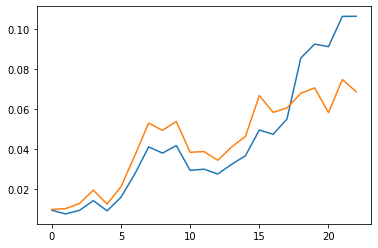

In [46]:
plt.plot(cat_distribution)
plt.plot(distribution)

In [44]:
KL_div(distribution,cat_distribution)

0.04373771356566333

In [47]:
KL_scores = dict()
for word in frequent_words:
    distribution = [year / (sum(word_by_year[word])) for year in word_by_year[word]]

    KL_scores[word] = KL_div(distribution,cat_distribution)

/var/folders/c6/5l1fxqh95lzdkbcb9p480sf00000gn/T/ipykernel_848/1047873131.py:4: RuntimeWarning: divide by zero encountered in log
  return sum(np.where(a != 0, a * np.log(a / b), 0))
/var/folders/c6/5l1fxqh95lzdkbcb9p480sf00000gn/T/ipykernel_848/1047873131.py:4: RuntimeWarning: invalid value encountered in multiply
  return sum(np.where(a != 0, a * np.log(a / b), 0))


In [49]:
KL_sorting = sorted(KL_scores, key=KL_scores.get, reverse=True)
KL_sorting

['successful',
 'unknown',
 'prior',
 'android',
 'unauthenticated',
 'vulnerable',
 'unspecified',
 'discover',
 'exploit',
 'result',
 'php',
 'lead',
 'execution',
 'validation',
 'exist',
 'different',
 'malicious',
 'disclosure',
 'v',
 'version',
 'note',
 'relate',
 'possibly',
 'sql',
 'affect',
 'input',
 'parameter',
 'issue',
 'vector',
 'multiple',
 'allows',
 'inject',
 'obtain',
 'product',
 'html',
 'aka',
 'properly',
 'corruption',
 'device',
 'url',
 'network',
 'plugin',
 'x',
 'injection',
 'send',
 'craft',
 'remote',
 'check',
 'sensitive',
 'command',
 'gain',
 'xss',
 'arbitrary',
 'software',
 'crosssite',
 'execute',
 'cve',
 'handle',
 'linux',
 'oracle',
 'contain',
 'application',
 'data',
 'management',
 'earlier',
 'process',
 'windows',
 'directory',
 'privilege',
 'component',
 'ibm',
 'id',
 'web',
 'impact',
 'denial',
 'microsoft',
 'kernel',
 'message',
 'memory',
 'cisco',
 'overflow',
 'crash',
 'access',
 'page',
 'script',
 'buffer',
 'authentic

In [50]:
A = [[1, 4, 5], 
    [-5, 8, 9]]

In [51]:
print(A)

[[1, 4, 5], [-5, 8, 9]]


In [84]:
test_dict = dict()
test_dict[0] = 5
test_dict[1] = 6
test_dict[0] = 7

In [80]:
def makerow(seed):
    constant = (1 - (0.1 * len(seed))) / (len(vocab) - len(seed))
    row = np.empty(len(vocab))
    row.fill(constant)
    for word in seed:
        row[vocab.token2id[word]] = 0.1
    return row


In [89]:
seed_0 = ['buffer', 'overflow']
seed_1 = ['xss', 'crosssite']
seed_2 = ['sql', 'injection']
seed_3 = ['plugin']
seed_4 = ['cisco', 'ibm', 'oracle']

seeds = dict()
for row in range(0,20):
    seeds[row] = makerow([])
seeds[0] = makerow(seed_0)
seeds[1] = makerow(seed_1)
seeds[2] = makerow(seed_2)
seeds[3] = makerow(seed_3)
seeds[4] = makerow(seed_4)


In [90]:
topic_word_prior = []
for row in range(0, 20):
    topic_word_prior.append(seeds[row])

In [93]:
vocab.token2id['buffer']

15

In [96]:
print(topic_word_prior[0][vocab.token2id['buffer']])
print(topic_word_prior[0][vocab.token2id['buffer']+1])

0.1
5.0773985948299395e-06
